In [ ]:
import tarfile
import os
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

import cv2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import keras.optimizers
from sklearn.preprocessing import LabelEncoder
from keras import Sequential
from keras.layers import Dense,Conv2D,Flatten,Dense,MaxPooling2D,Dropout
import PIL
from tensorflow.keras import layers
from keras.models import Sequential
import keras

2.8.2


In [ ]:
mnist = tf.keras.datasets.mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data() 

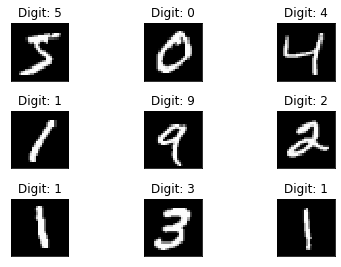

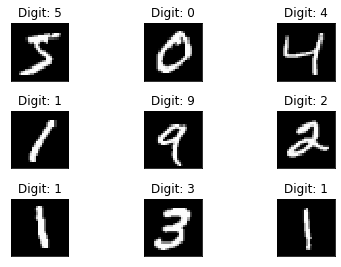

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure()
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.tight_layout()
  plt.imshow(X_train[i], cmap='gray', interpolation='none')
  plt.title("Digit: {}".format(y_train[i]))
  plt.xticks([])
  plt.yticks([])
fig

In [ ]:

img_rows , img_cols = 28, 28
from keras import backend as k

if k.image_data_format() == 'channels_first':
    X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
    X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
    X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

X_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [ ]:
num_category = 10
y_train = keras.utils.np_utils.to_categorical(y_train, num_category)
y_test = keras.utils.np_utils.to_categorical(y_test, num_category)
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [ ]:
model = tf.keras.Sequential([

         tf.keras.layers.Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape),
         
         tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
         tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
         tf.keras.layers.Dropout(0.25),
         tf.keras.layers.Flatten(),
         tf.keras.layers.Dense(128, activation='relu'),
         tf.keras.layers.Dropout(0.5),
         tf.keras.layers.Dense(num_category, activation='softmax'),


         ])


In [ ]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 conv2d_19 (Conv2D)          (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 12, 12, 64)       0         
 2D)                                                             
                                                                 
 dropout_18 (Dropout)        (None, 12, 12, 64)        0         
                                                                 
 flatten_12 (Flatten)        (None, 9216)              0         
                                                                 
 dense_21 (Dense)            (None, 128)               1179776   
                                                     

In [ ]:
H = model.fit(X_train, y_train, batch_size=128, epochs=50, verbose=1, validation_data=(X_test, y_test))

Epoch 1/50
469/469 [==============================] - 150s 319ms/step - loss: 0.0829 - accuracy: 0.9756 - val_loss: 0.0367 - val_accuracy: 0.9885
Epoch 2/50
469/469 [==============================] - 156s 333ms/step - loss: 0.0640 - accuracy: 0.9802 - val_loss: 0.0336 - val_accuracy: 0.9884
Epoch 3/50
469/469 [==============================] - 151s 322ms/step - loss: 0.0528 - accuracy: 0.9839 - val_loss: 0.0317 - val_accuracy: 0.9898
Epoch 4/50
469/469 [==============================] - 149s 317ms/step - loss: 0.0430 - accuracy: 0.9869 - val_loss: 0.0295 - val_accuracy: 0.9903
Epoch 5/50
469/469 [==============================] - 149s 317ms/step - loss: 0.0405 - accuracy: 0.9875 - val_loss: 0.0299 - val_accuracy: 0.9904
Epoch 6/50
469/469 [==============================] - 148s 316ms/step - loss: 0.0337 - accuracy: 0.9895 - val_loss: 0.0280 - val_accuracy: 0.9908
Epoch 7/50
469/469 [==============================] - 147s 313ms/step - loss: 0.0306 - accuracy: 0.9906 - val_loss: 0.0286 -

In [ ]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0]) 
print('Test accuracy:', score[1]) 

Test loss: 0.04184624180197716
Test accuracy: 0.9929999709129333


<Figure size 432x288 with 0 Axes>

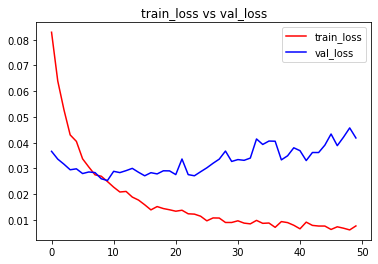

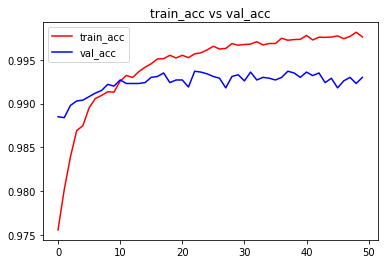

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [ ]:
train_loss=H.history['loss']
val_loss=H.history['val_loss']
train_acc=H.history['accuracy']
val_acc=H.history['val_accuracy']

epochs = range(len(train_acc))

plt.plot(epochs,train_loss,'r', label='train_loss')
plt.plot(epochs,val_loss,'b', label='val_loss')
plt.title('train_loss vs val_loss')
plt.legend()
plt.figure()

plt.plot(epochs,train_acc,'r', label='train_acc')
plt.plot(epochs,val_acc,'b', label='val_acc')
plt.title('train_acc vs val_acc')
plt.legend()
plt.figure()
plt.figure()

In [ ]:
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal", 
                                                 input_shape=input_shape),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)